In [1]:
import pandas as pd # type: ignore
import geopandas as gpd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np


from project import obtener_rutas_shp # type: ignore
from project import Beneficiarios
from project import calcular_minmax
from project import plot_minmax
from project import plot_totals
from project import Entidades_beneficiarios
from project import Mapa_Entidades

### Preguntas base

Análisis Exploratorio de Datos sobre Fertilizantes Agrícolas en un Programa de Gobierno Mexicano

Para realizar un análisis exploratorio de datos sobre el tema de fertilizantes agrícolas en el programa de gobierno mexicano, puedes formular las siguientes preguntas:

¿Cuál es la distribución geográfica de los beneficiarios?

Examina la columna “ENTIDAD” para identificar las regiones con mayor participación en el programa de fertilizantes.
¿Cuáles son los cultivos prioritarios que reciben apoyo?

Utiliza la columna “PRODUCTO” para identificar los cultivos específicos que se benefician del programa.
¿Cómo ha variado el monto de apoyo a lo largo del tiempo?

Analiza la columna “MONTO FEDERAL” para identificar tendencias en los montos asignados a lo largo de diferentes periodos.


<Axes: >

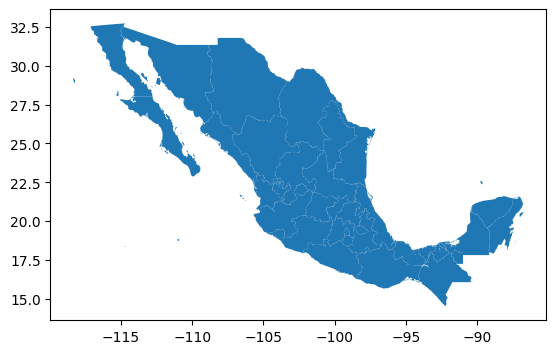

In [2]:
rutas_de_carpetas = obtener_rutas_shp()
localidades_shp = gpd.read_file(rutas_de_carpetas['Mexico'])
localidades_shp.plot()

In [3]:
Beneficiarios_2020 = Beneficiarios(2020)
Beneficiarios_2021 = Beneficiarios(2021)
Beneficiarios_2022 = Beneficiarios(2022)
Beneficiarios_2023 = Beneficiarios(2023)

In [4]:
columns_filter = ['BENEFICIARIO','PROGRAMA','COMPONENTE','SUBCOMPONENTE','APOYO','ACTIVIDAD','ESLABÓN','CICLO AGRÍCOLA']
Beneficiarios_2020 = Beneficiarios_2020.drop(columns=columns_filter)
Beneficiarios_2021 = Beneficiarios_2021.drop(columns=columns_filter)
Beneficiarios_2022 = Beneficiarios_2022.drop(columns=columns_filter)
Beneficiarios_2023 = Beneficiarios_2023.drop(columns=columns_filter)

## Inversiones Generales

In [5]:
montos_2020 = calcular_minmax(Beneficiarios_2020)
montos_2021 = calcular_minmax(Beneficiarios_2021)
montos_2022 = calcular_minmax(Beneficiarios_2022)
montos_2023 = calcular_minmax(Beneficiarios_2023)

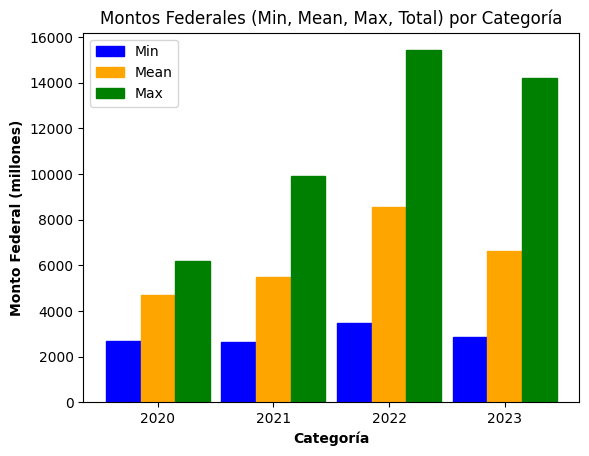

In [6]:
plot_minmax(montos_2020, montos_2021, montos_2022, montos_2023, labels=['2020', '2021', '2022', '2023'])



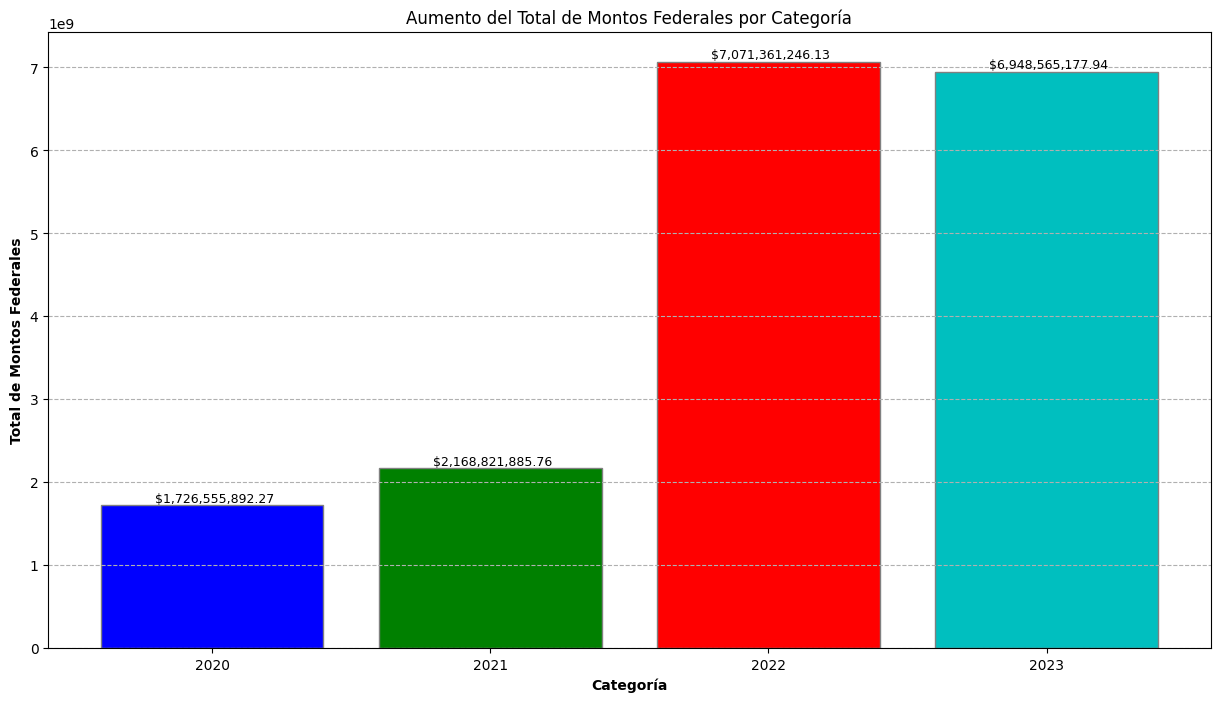

In [7]:
plot_totals(montos_2020, montos_2021, montos_2022, montos_2023, labels=['2020', '2021', '2022', '2023'])

## Inversiones por estado

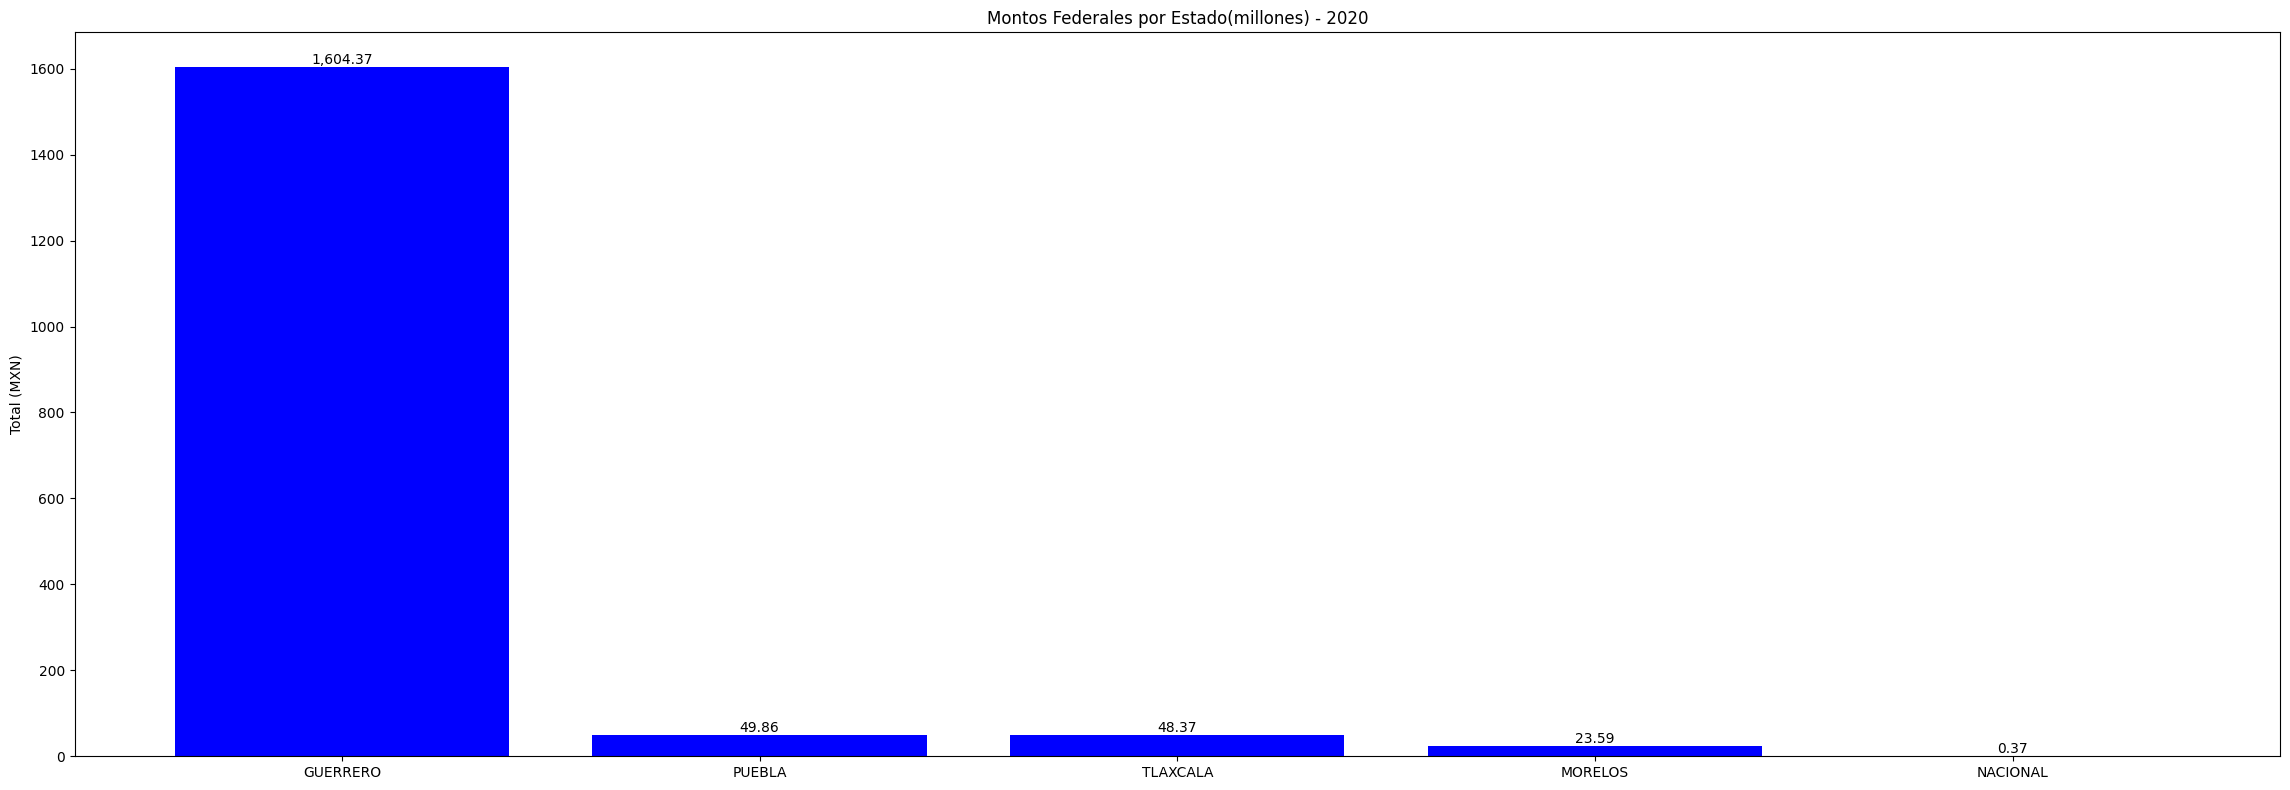

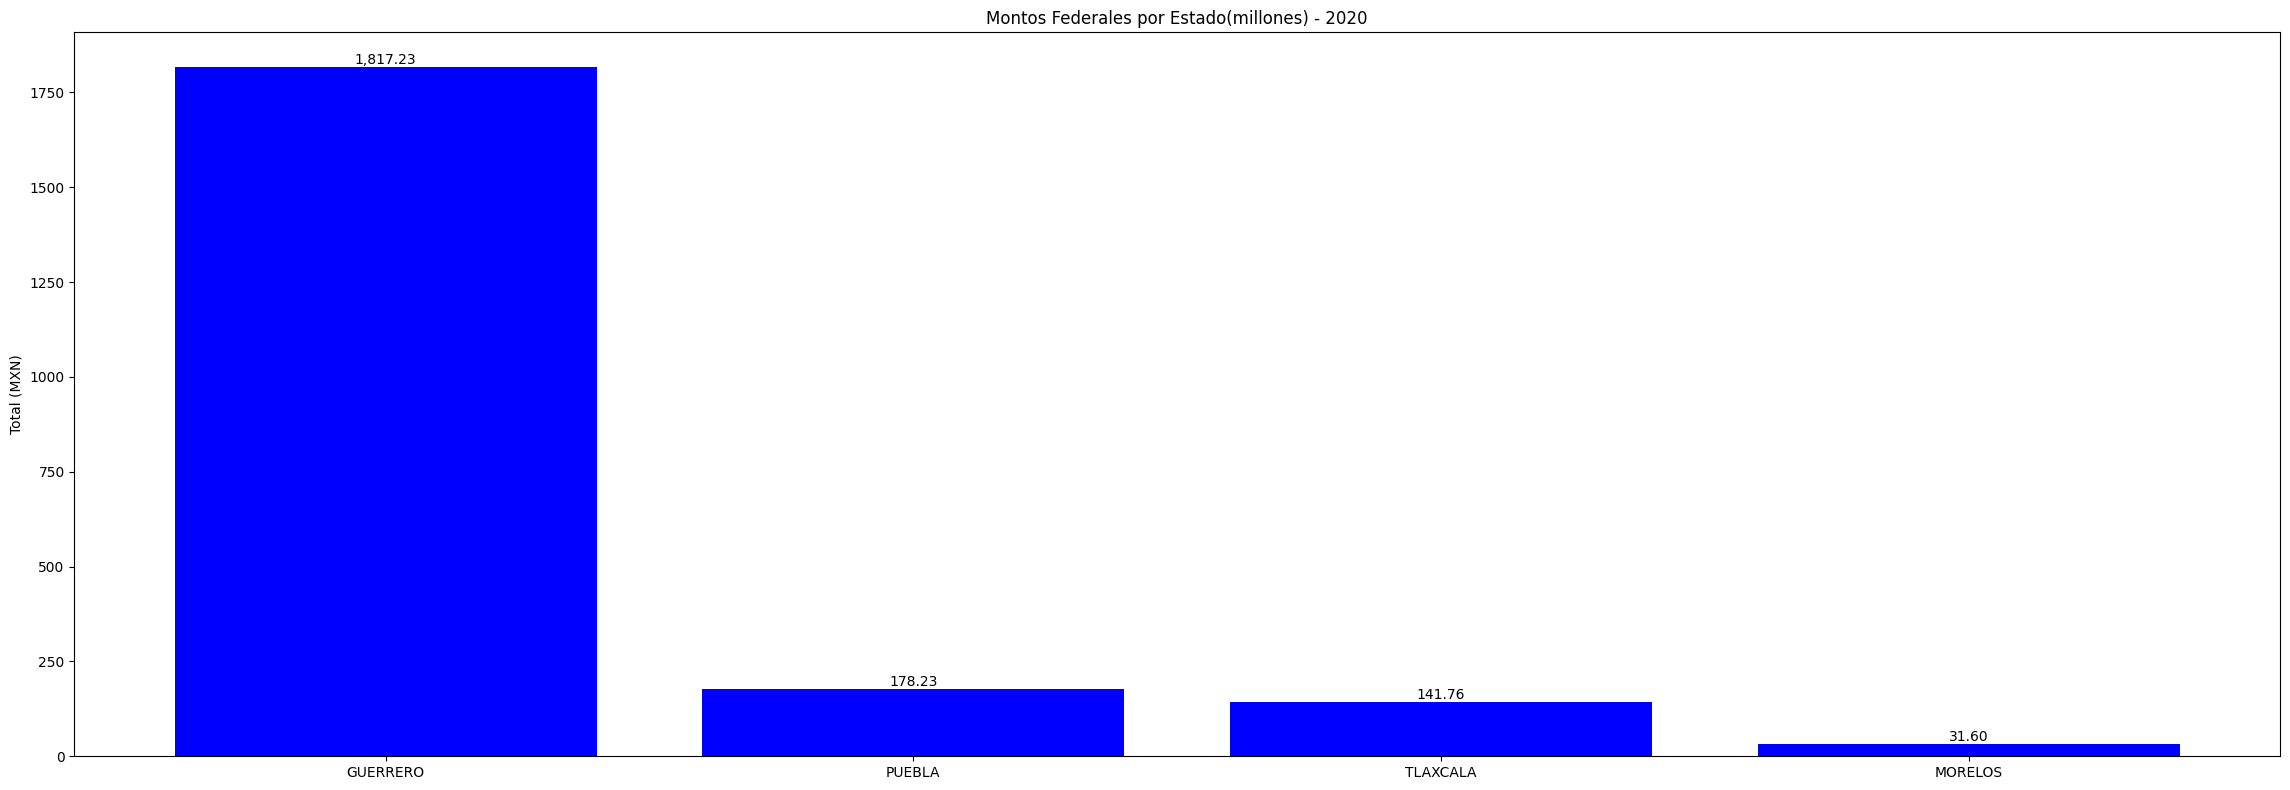

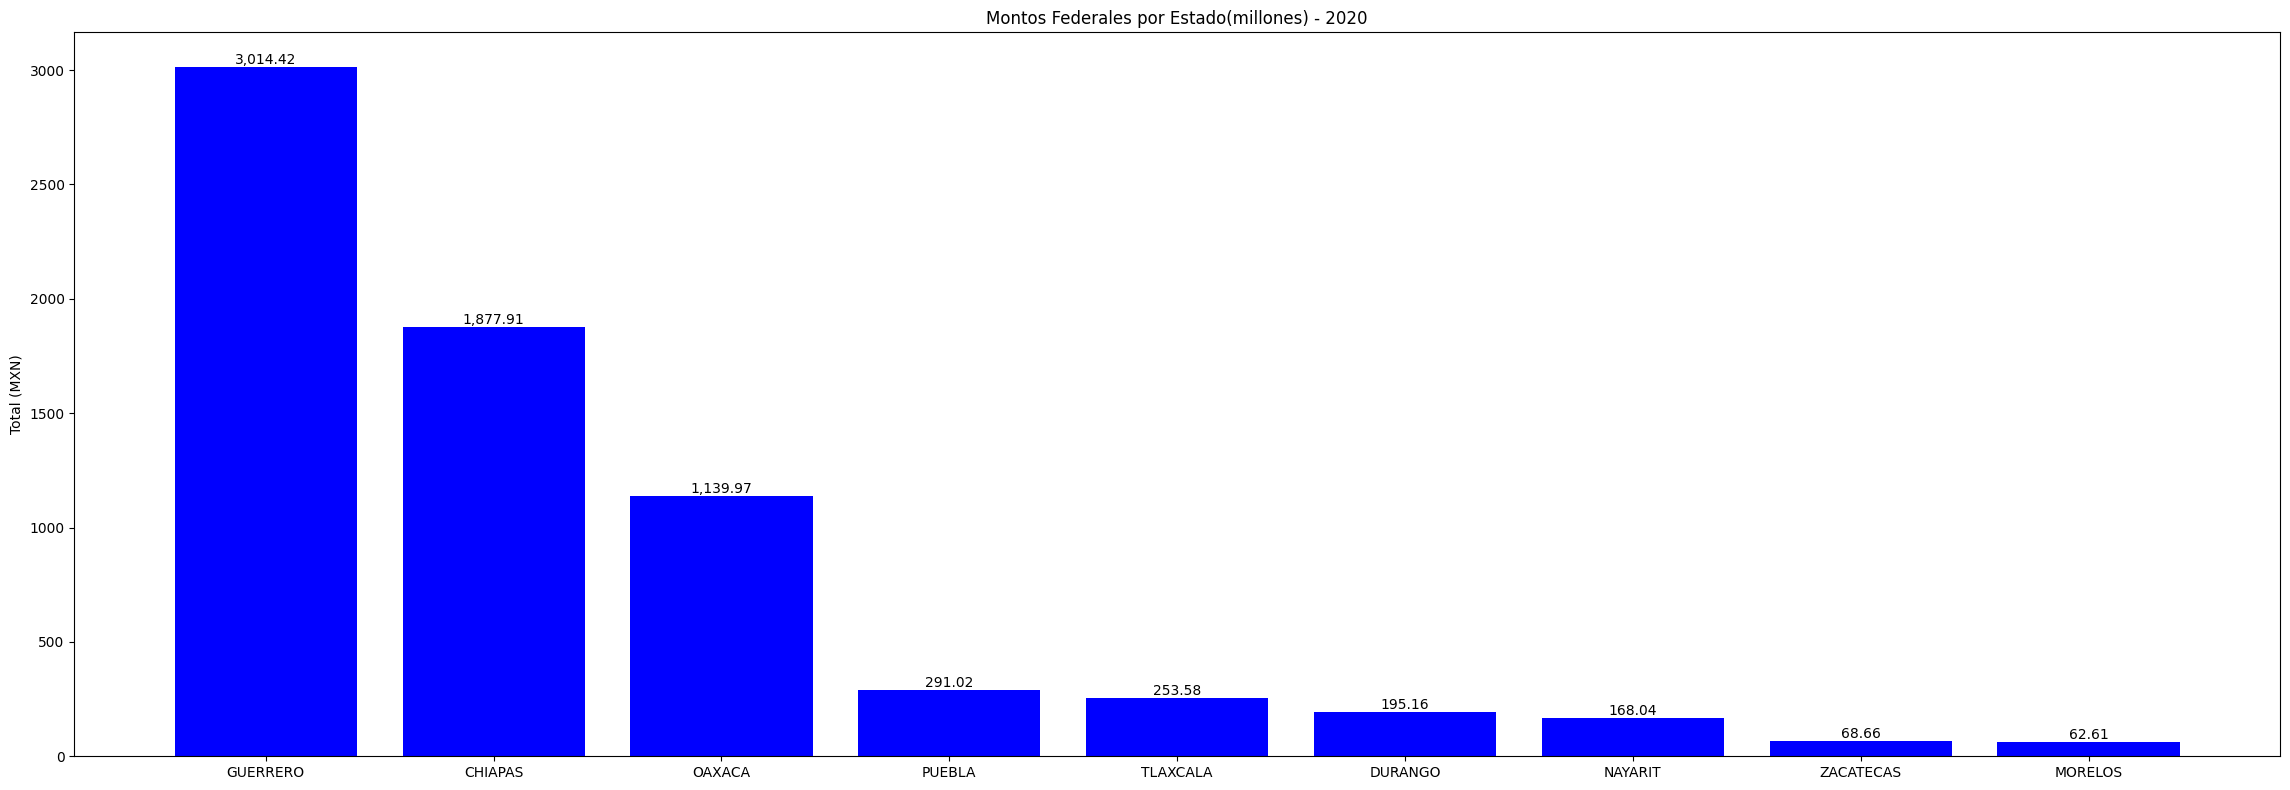

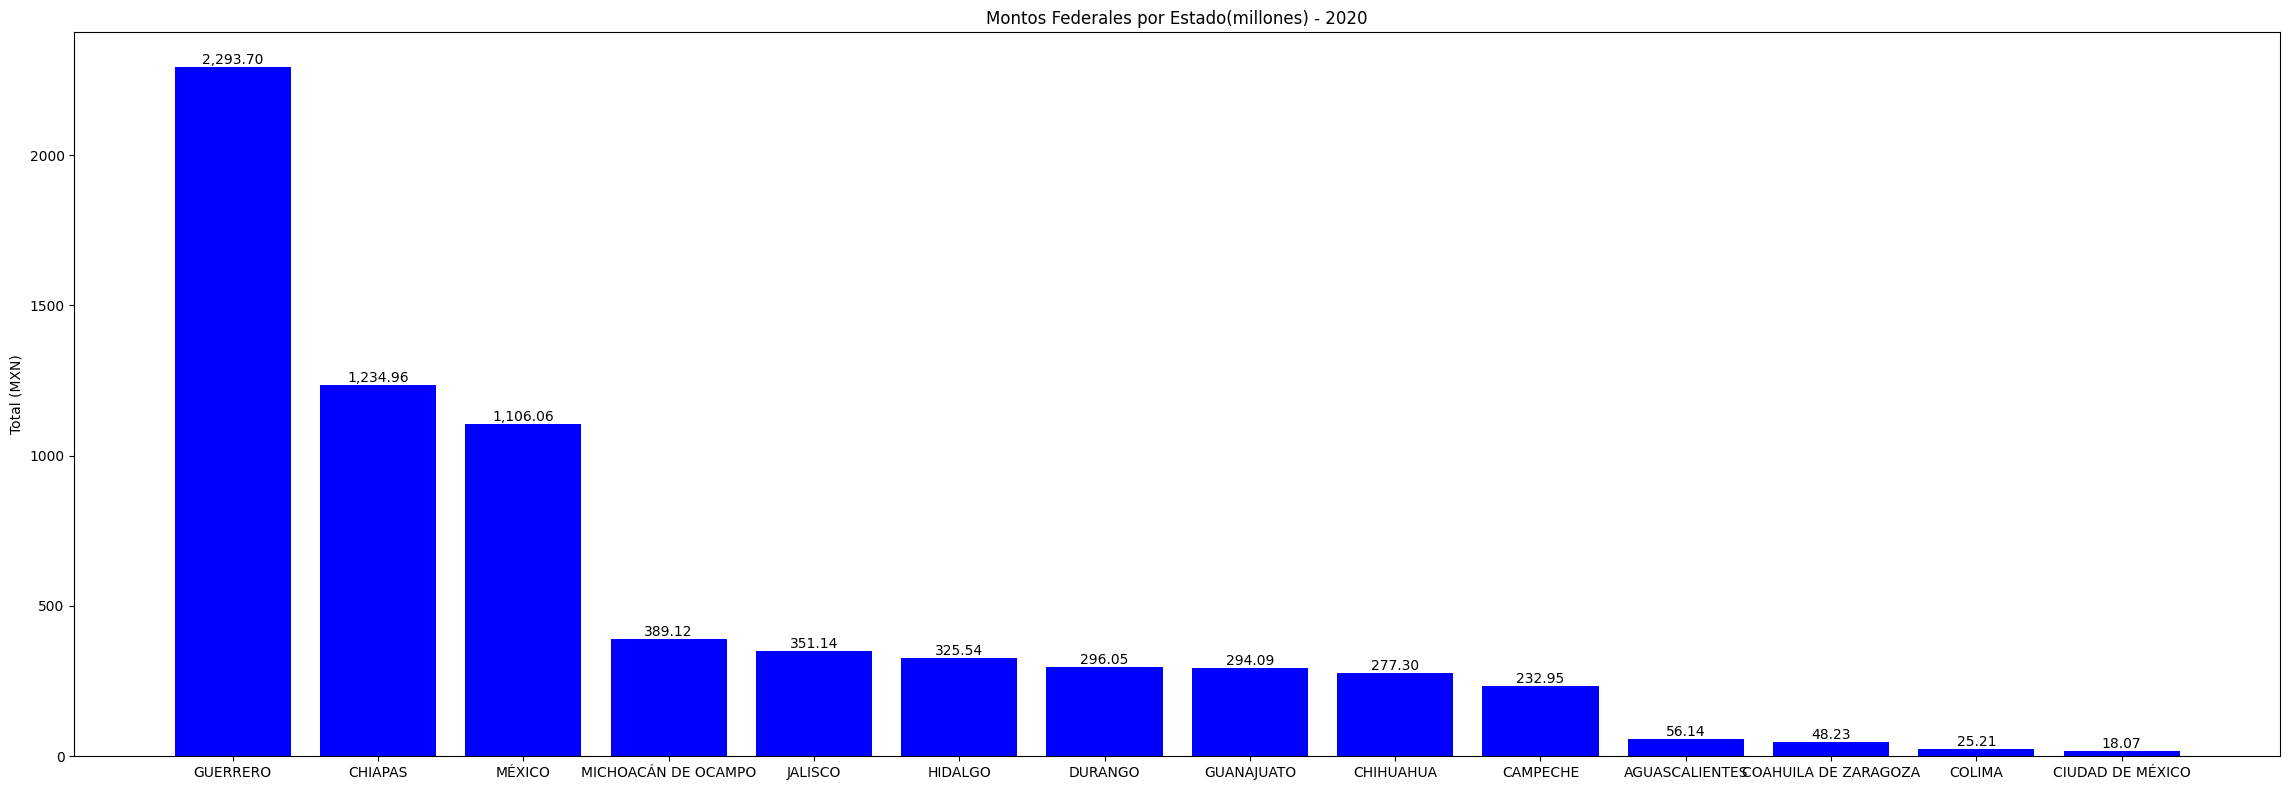

In [8]:
Entidades_beneficiarios(Beneficiarios_2020,figsize=(23,8))
Entidades_beneficiarios(Beneficiarios_2021,figsize=(23,8))
Entidades_beneficiarios(Beneficiarios_2022,figsize=(23,8))
Entidades_beneficiarios(Beneficiarios_2023,figsize=(23,8))

['DURANGO', 'AGUASCALIENTES', 'JALISCO', 'MÉXICO', 'CHIHUAHUA', 'GUANAJUATO', 'MICHOACÁN DE OCAMPO', 'COAHUILA DE ZARAGOZA', 'CIUDAD DE MÉXICO', 'COLIMA', 'CAMPECHE', 'HIDALGO', 'CHIAPAS', 'GUERRERO']
 
Tittle: ['Durango', 'Aguascalientes', 'Jalisco', 'México', 'Chihuahua', 'Guanajuato', 'Michoacán De Ocampo', 'Coahuila De Zaragoza', 'Ciudad De México', 'Colima', 'Campeche', 'Hidalgo', 'Chiapas', 'Guerrero']

Dataframe:                  NOM_ENT  Beneficiario
0                Durango             1
1         Aguascalientes             1
2                Jalisco             1
3                 México             1
4              Chihuahua             1
5             Guanajuato             1
6    Michoacán De Ocampo             1
7   Coahuila De Zaragoza             1
8       Ciudad De México             1
9                 Colima             1
10              Campeche             1
11               Hidalgo             1
12               Chiapas             1
13              Guerrero      

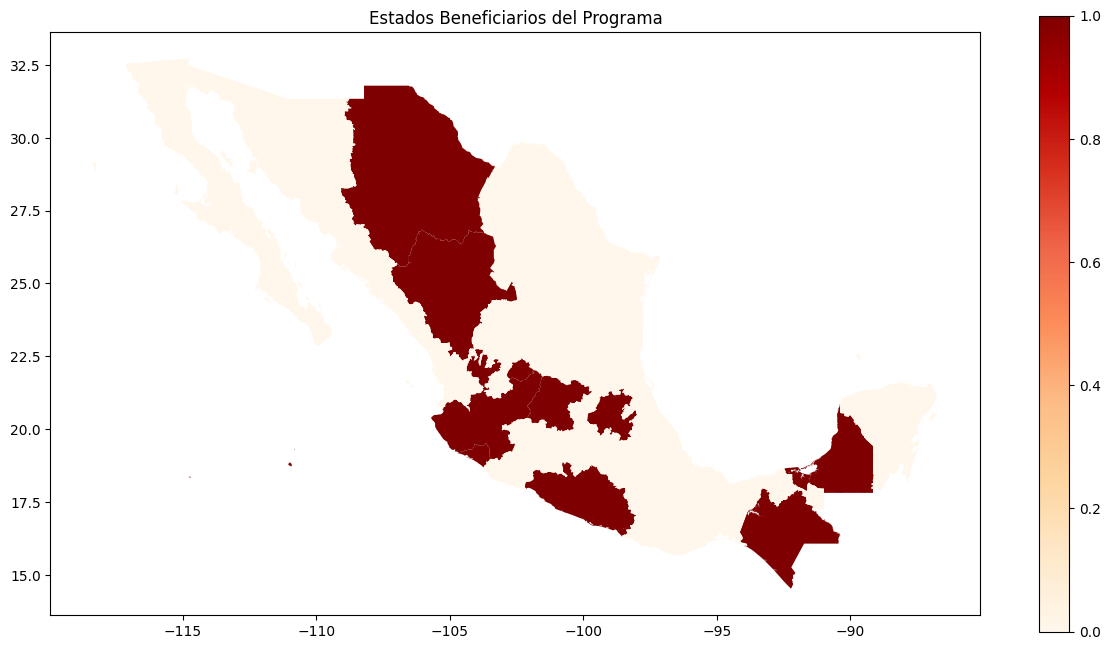

In [9]:
Mapa_Entidades(dataframe=Beneficiarios_2023,shp=localidades_shp)

### Productos Agricolas

    ENTIDAD               PRODUCTO  CANTIDAD_CULTIVOS
0  GUERRERO  Cultivo de maíz grano             340560
1   MORELOS  Cultivo de maíz grano               4979
2  NACIONAL  Cultivo de maíz grano                 84
3    PUEBLA  Cultivo de maíz grano              14196
4  TLAXCALA  Cultivo de maíz grano               9302


<Figure size 1400x800 with 0 Axes>

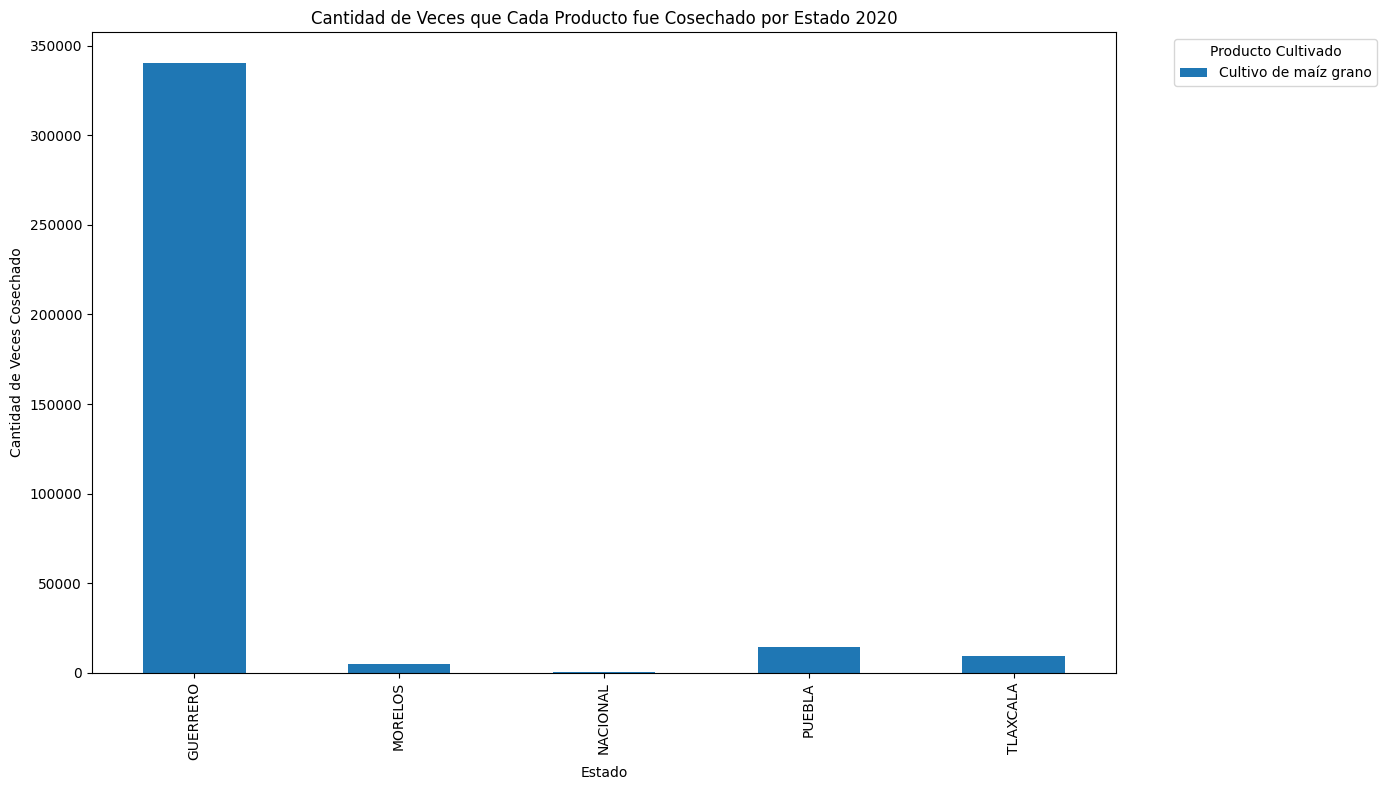

In [10]:
# Sumar la cantidad de veces que cada producto fue cosechado por estado
producto_por_estado = Beneficiarios_2020.groupby(['ENTIDAD', 'PRODUCTO']).size().reset_index(name='CANTIDAD_CULTIVOS')

# Pivotar la tabla para tener los productos como columnas
producto_pivot = producto_por_estado.pivot(index='ENTIDAD', columns='PRODUCTO', values='CANTIDAD_CULTIVOS').fillna(0)

# Mostrar el resultado
print(producto_por_estado)

# Configuración del tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras apiladas
producto_pivot.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))

# Configuración de la gráfica
plt.title('Cantidad de Veces que Cada Producto fue Cosechado por Estado 2020')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Veces Cosechado')
plt.xticks(rotation=90)
plt.legend(title='Producto Cultivado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()


    ENTIDAD                      PRODUCTO  CANTIDAD_CULTIVOS
0  GUERRERO              Cultivo de arroz                832
1  GUERRERO       Cultivo de frijol grano              13055
2  GUERRERO  Cultivo de maíz grano blanco             320428
3   MORELOS              Cultivo de arroz                194
4   MORELOS  Cultivo de maíz grano blanco               6243
5    PUEBLA       Cultivo de maíz elotero              10455
6    PUEBLA  Cultivo de maíz grano blanco              18624
7    PUEBLA   Cultivo de otras hortalizas               1789
8  TLAXCALA  Cultivo de maíz grano blanco              22922
9  TLAXCALA   Cultivo de otras hortalizas                441


<Figure size 1400x800 with 0 Axes>

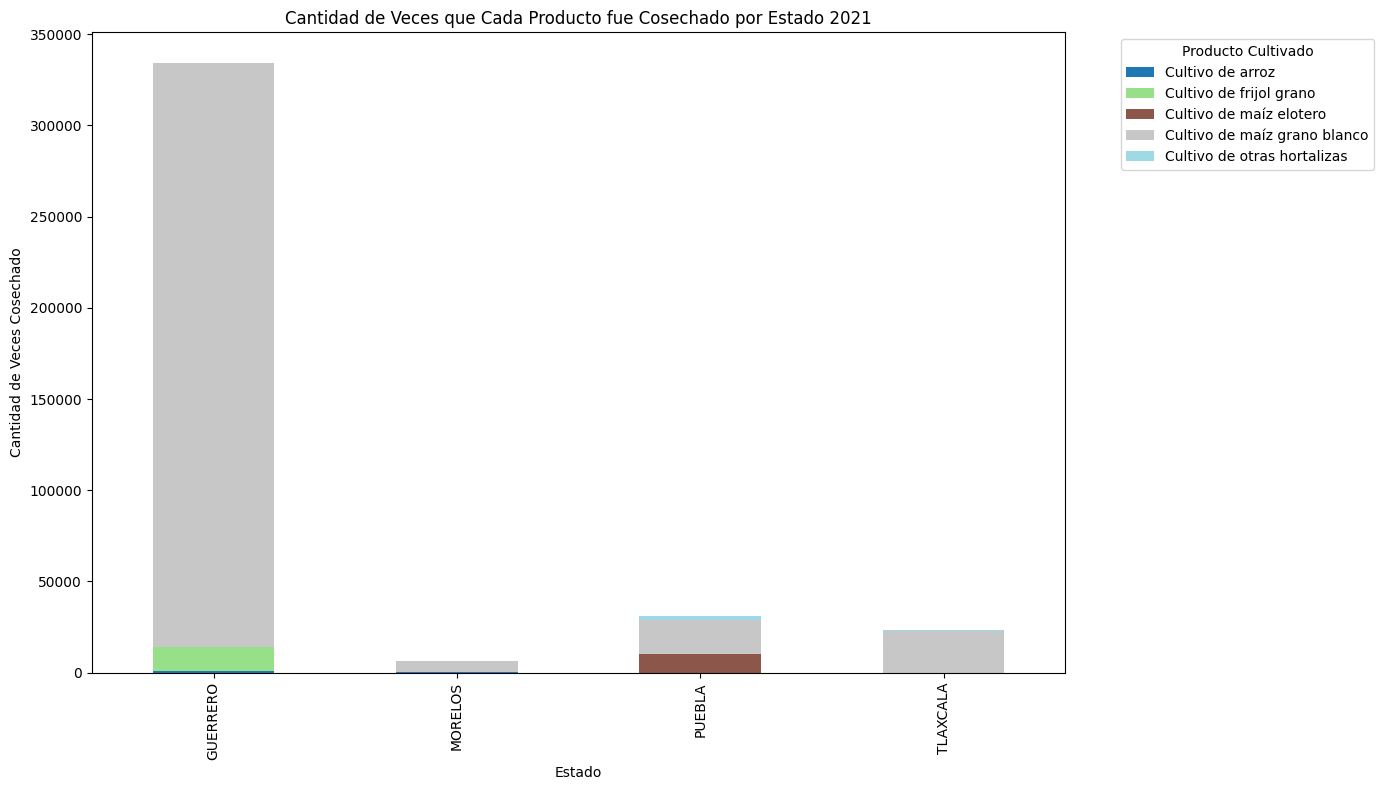

In [11]:
producto_por_estado = Beneficiarios_2021.groupby(['ENTIDAD', 'PRODUCTO']).size().reset_index(name='CANTIDAD_CULTIVOS')

# Pivotar la tabla para tener los productos como columnas
producto_pivot = producto_por_estado.pivot(index='ENTIDAD', columns='PRODUCTO', values='CANTIDAD_CULTIVOS').fillna(0)

# Mostrar el resultado
print(producto_por_estado)

# Configuración del tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras apiladas
producto_pivot.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14,8))

# Configuración de la gráfica
plt.title('Cantidad de Veces que Cada Producto fue Cosechado por Estado 2021')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Veces Cosechado')
plt.xticks(rotation=90)
plt.legend(title='Producto Cultivado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()


      ENTIDAD                      PRODUCTO  CANTIDAD_CULTIVOS
0     CHIAPAS  Cultivo de maíz grano blanco             250573
1     CHIAPAS                         Milpa                104
2     DURANGO       Cultivo de frijol grano               3816
3     DURANGO  Cultivo de maíz grano blanco              11762
4    GUERRERO              Cultivo de arroz                781
5    GUERRERO       Cultivo de frijol grano              12178
6    GUERRERO  Cultivo de maíz grano blanco             316448
7     MORELOS              Cultivo de arroz                175
8     MORELOS  Cultivo de maíz grano blanco               5697
9     NAYARIT       Cultivo de frijol grano               3660
10    NAYARIT  Cultivo de maíz grano blanco              10357
11     OAXACA  Cultivo de maíz grano blanco             130804
12     OAXACA                         Milpa              22508
13     PUEBLA       Cultivo de maíz elotero               9712
14     PUEBLA  Cultivo de maíz grano blanco            

<Figure size 1400x800 with 0 Axes>

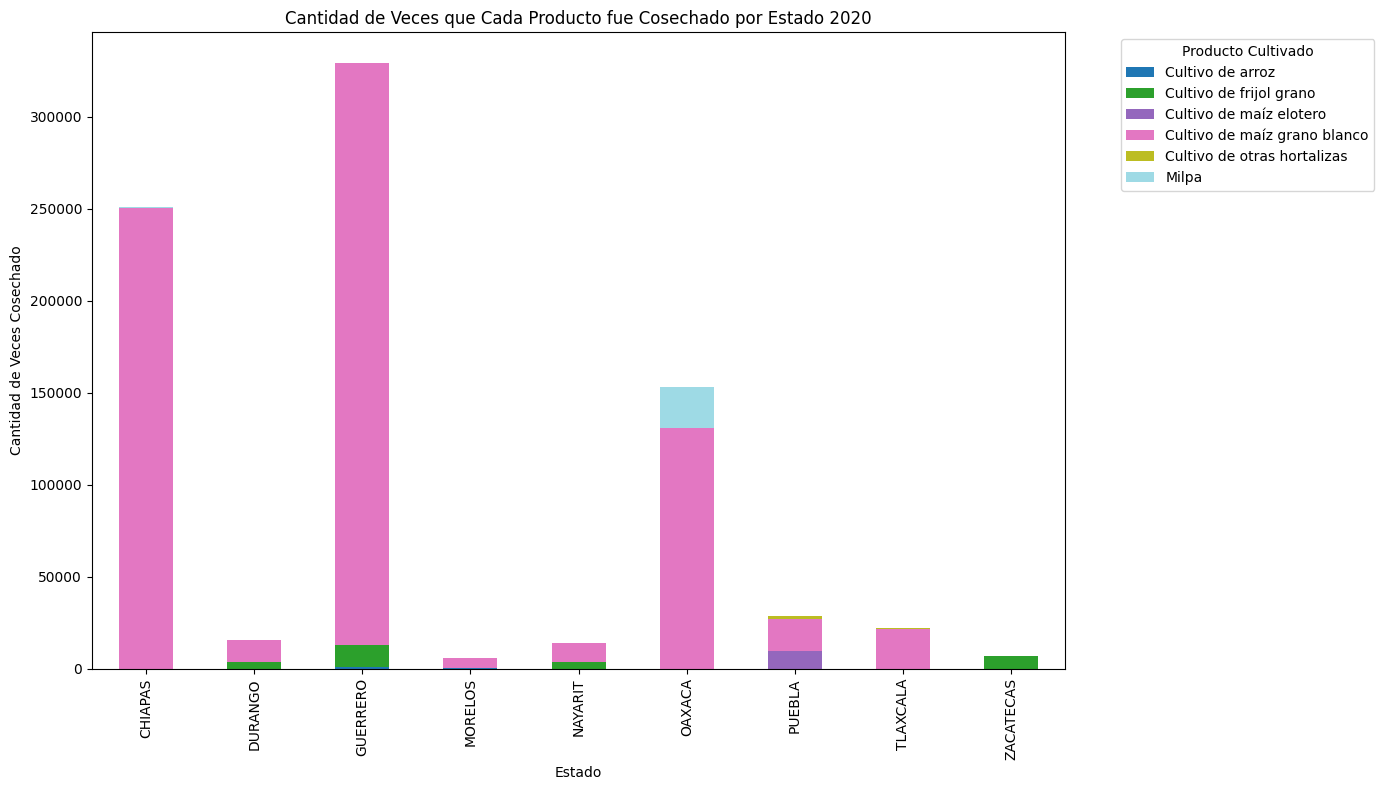

In [12]:
producto_por_estado = Beneficiarios_2022.groupby(['ENTIDAD', 'PRODUCTO']).size().reset_index(name='CANTIDAD_CULTIVOS')

# Pivotar la tabla para tener los productos como columnas
producto_pivot = producto_por_estado.pivot(index='ENTIDAD', columns='PRODUCTO', values='CANTIDAD_CULTIVOS').fillna(0)

import matplotlib.pyplot as plt

# Mostrar el resultado
print(producto_por_estado)

# Configuración del tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras apiladas
producto_pivot.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))

# Configuración de la gráfica
plt.title('Cantidad de Veces que Cada Producto fue Cosechado por Estado 2020')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Veces Cosechado')
plt.xticks(rotation=90)
plt.legend(title='Producto Cultivado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()


           ENTIDAD                      PRODUCTO  CANTIDAD_CULTIVOS
0   AGUASCALIENTES       Cultivo de frijol grano                239
1   AGUASCALIENTES         Cultivo de maíz grano               6289
2   AGUASCALIENTES                         Milpa                 30
3         CAMPECHE              Cultivo de arroz                 24
4         CAMPECHE       Cultivo de frijol grano                 25
..             ...                           ...                ...
90          MÉXICO   Cultivo de otras hortalizas                 24
91          MÉXICO  Cultivo de otras leguminosas                173
92          MÉXICO        Cultivo de sorgo grano                 19
93          MÉXICO              Cultivo de trigo               1136
94          MÉXICO                         Milpa               1681

[95 rows x 3 columns]


<Figure size 1400x800 with 0 Axes>

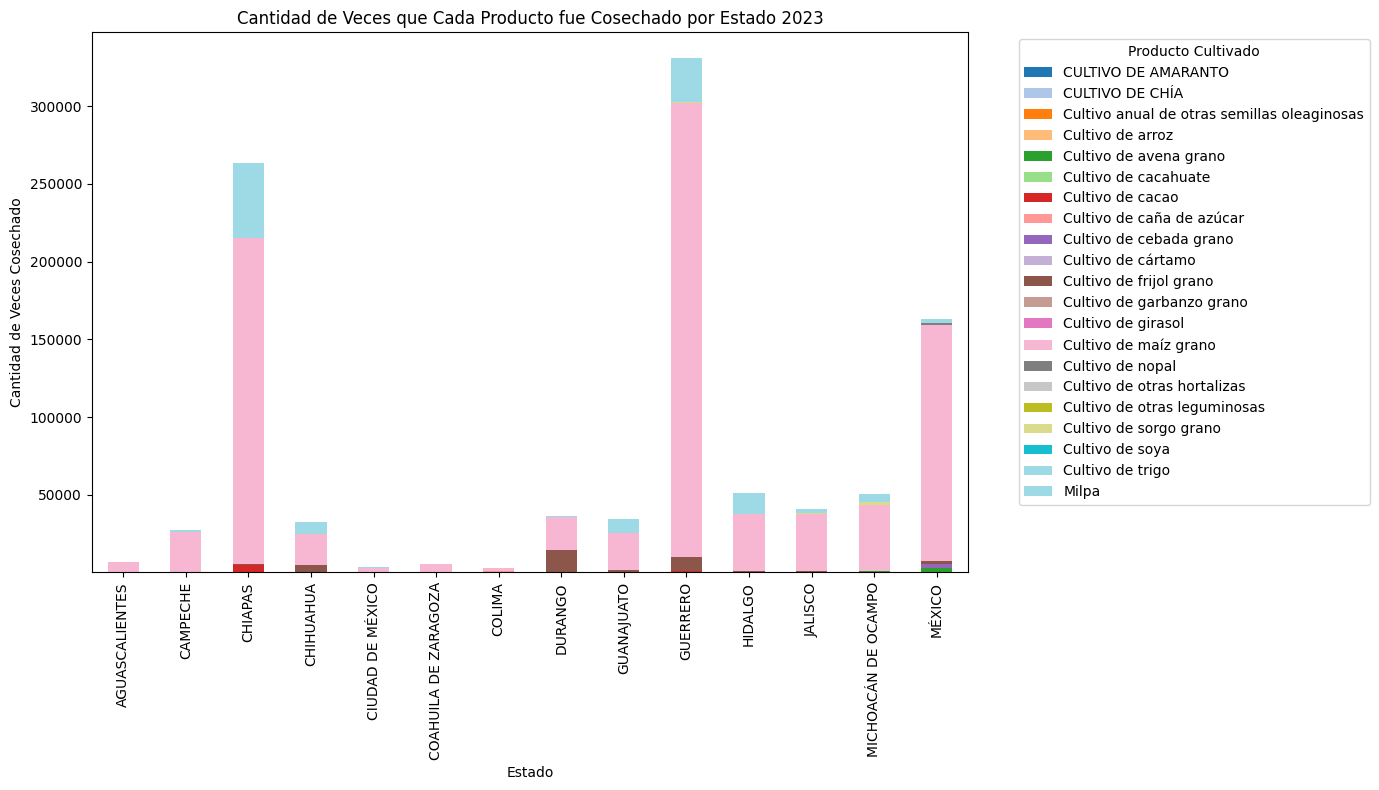

In [13]:
producto_por_estado = Beneficiarios_2023.groupby(['ENTIDAD', 'PRODUCTO']).size().reset_index(name='CANTIDAD_CULTIVOS')

# Pivotar la tabla para tener los productos como columnas
producto_pivot = producto_por_estado.pivot(index='ENTIDAD', columns='PRODUCTO', values='CANTIDAD_CULTIVOS').fillna(0)

# Mostrar el resultado
print(producto_por_estado)

# Configuración del tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras apiladas
producto_pivot.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))

# Configuración de la gráfica
plt.title('Cantidad de Veces que Cada Producto fue Cosechado por Estado 2023')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Veces Cosechado')
plt.xticks(rotation=90)
plt.legend(title='Producto Cultivado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()
